# Calculating WND-CHARM Features for a grayscale image
## From both Numpy array and from a Tiff file

In [1]:
from wndcharm import diagnostics
print diagnostics

WND-CHARM Python API Diagnostics
Executable:
	/usr/local/opt/python/bin/python2.7
PYTHONPATH environment variable:
	/Users/colettace/src/wnd-charm/build/lib.macosx-10.10-x86_64-2.7
WND-CHARM library path:
	/Users/colettace/src/wnd-charm/build/lib.macosx-10.10-x86_64-2.7/wndcharm/wndcharm.pyc
Package versions:
	python    	2.7.11 (default, Jan 22 2016, 08:28:37)  [GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]
	wndcharm  	0.9.14+9050371
	numpy     	1.11.1
	scipy     	0.18.0
	matplotlib	1.5.1
	sklearn   	0.17.1
	skimage   	0.11.3
	IPython   	5.0.0
	tifffile  	0.7.0
	PIL       	1.1.7
	pandas    	0.17.1



In [2]:
%matplotlib inline

In [3]:
import numpy as np

In [4]:
from skimage.io import imshow, imsave

In [5]:
from skimage.data import chelsea

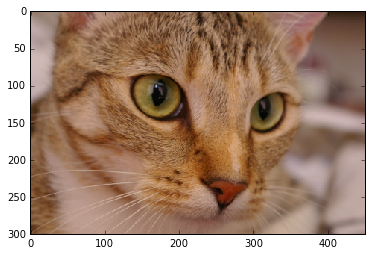

In [6]:
imshow( chelsea())

In [7]:
img = chelsea()

In [8]:
type( img)

numpy.ndarray

In [9]:
img.shape

(300, 451, 3)

In [10]:
img.dtype

dtype('uint8')

In [11]:
for d, label in enumerate( ('r', 'g', 'b')):
    plane = img[:,:,d]
    print "{}: min={}, max={}".format( label, plane.min(), plane.max())

r: min=2, max=215
g: min=4, max=189
b: min=0, max=231


In [12]:
from skimage.color import rgb2gray

In [13]:
gray_img = rgb2gray( img)

In [14]:
gray_img.shape

(300, 451)

In [15]:
gray_img.dtype

dtype('float64')

In [16]:
gray_img.min(), gray_img.max()

(0.01512078431372549, 0.75561098039215691)

In [17]:
gray_img = (gray_img * 255 ).astype( np.uint8 )

In [18]:
gray_img.dtype

dtype('uint8')

In [19]:
gray_img.min(), gray_img.max()

(3, 192)

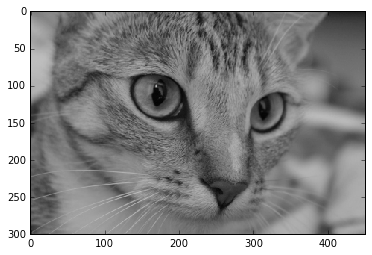

In [20]:
imshow( gray_img)

In [21]:
from wndcharm.PyImageMatrix import PyImageMatrix

In [22]:
matrix = PyImageMatrix()
matrix.allocate(gray_img.shape[1], gray_img.shape[0])
numpy_matrix = matrix.as_ndarray()
numpy_matrix[:] = gray_img

In [23]:
from wndcharm.FeatureVector import FeatureVector

In [24]:
fv = FeatureVector( name='FromNumpyMatrix', long=True, original_px_plane=matrix )

In [25]:
len( fv.values)

TypeError: object of type 'NoneType' has no len()

In [26]:
import time

In [27]:
t1 = time.time()
fv.GenerateFeatures(quiet=False, write_to_disk=True)
t2 = time.time()
print "Feat calc took {:0.2f} seconds.".format( t2-t1 )

CALCULATING FEATURES FROM None <FeatureVector "FromNumpyMatrix" fs_col=0>
CALCULATED: <FeatureVector "FromNumpyMatrix" n_features=2919 fs_col=0>
Writing signature file "FromNumpyMatrix-l.sig"
Feat calc took 12.05 seconds.


In [28]:
fv.values

array([  4.41400000e+04,   4.81422488e-02,   1.07444423e-01, ...,
        -4.98516383e+01,   2.01940375e+02,   6.98836130e-01])

In [29]:
len(fv.values)

2919

In [30]:
imsave( "chelsea_tiff.tiff", gray_img )

In [31]:
ls

FeaturesWithoutTiff.ipynb  chelsea_tiff.tiff
FromNumpyMatrix-l.sig


In [32]:
!tiffinfo chelsea_tiff.tiff

TIFF Directory at offset 0x8 (8)
  Subfile Type: (0 = 0x0)
  Image Width: 451 Image Length: 300
  Bits/Sample: 8
  Sample Format: unsigned integer
  Compression Scheme: None
  Photometric Interpretation: min-is-black
  Samples/Pixel: 1
  Rows/Strip: 300
  Planar Configuration: single image plane
  ImageDescription: {"shape": [300, 451]}
  Software: tifffile.py
  DateTime: 2016:08:31 10:31:54


In [33]:
tiff_fv = FeatureVector( name='FromTiff', long=True, source_filepath='chelsea_tiff.tiff' )

In [34]:
t1 = time.time()
tiff_fv.GenerateFeatures(quiet=False, write_to_disk=True)
t2 = time.time()
print "Feat calc took {:0.2f} seconds.".format( t2-t1 )

CALCULATING FEATURES FROM chelsea_tiff.tiff <FeatureVector "FromTiff" fs_col=0>
CALCULATED: <FeatureVector "FromTiff" n_features=2919 fs_col=0>
Writing signature file "chelsea_tiff-l.sig"
Feat calc took 11.62 seconds.


In [35]:
tiff_fv.values

array([  4.41400000e+04,   4.81422488e-02,   1.07444423e-01, ...,
        -4.98516383e+01,   2.01940375e+02,   6.98836130e-01])

In [36]:
from wndcharm.utils import compare

In [37]:
compare( tiff_fv.values, fv.values )

True

In [38]:
tiff_fv.values == fv.values

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [39]:
all( tiff_fv.values == fv.values )

True